In [115]:
import pandas as pd
import numpy as np
from plotnine import *

# Sprocati 2019 Jcon - Cases 1 and 2

## Case 1

In [116]:
## reading results
# os.getcwd()
results1 = pd.read_csv('data/sprocati2019-case1.csv', sep = '\t', skipinitialspace=True)
results1 = results1.drop([0,1])
results1 = results1.iloc[:, :-1]
# results['d_pot'] = results['potential']/results['dist']
results1

# # melting
# results_melted = pd.melt(results, id_vars = ['dist', 'time'])
# # results.melted['scenario'] = '2'
# results_melted

,dist,A_i,B_i,C_i,D_i,H,OH,pH,gA_i,gB_i,gC_i,gD_i,potential,current,time
2,0.025,1.000000e-96,1.000000e-96,10.000,10.0000,1.094900e-04,0.000112,6.9606,0.0,0.00000,0.90191,0.90191,0.000,0.000000,0.0
3,0.075,1.000000e-96,1.000000e-96,10.000,10.0000,1.094900e-04,0.000112,6.9606,0.0,0.00000,0.90191,0.90191,0.000,0.000000,0.0
4,0.125,1.000000e-96,1.000000e-96,10.000,10.0000,1.094900e-04,0.000112,6.9606,0.0,0.00000,0.90191,0.90191,0.000,0.000000,0.0
5,0.175,1.000000e-96,1.000000e-96,10.000,10.0000,1.094900e-04,0.000112,6.9606,0.0,0.00000,0.90191,0.90191,0.000,0.000000,0.0
6,0.225,1.000000e-96,1.000000e-96,10.000,10.0000,1.094900e-04,0.000112,6.9606,0.0,0.00000,0.90191,0.90191,0.000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,0.775,1.000000e-96,5.377000e-07,15.547,13.9070,5.639200e-09,2.278000,11.2490,0.0,0.88085,0.88085,0.88085,67.216,-0.005853,144.0
2898,0.825,1.000000e-96,8.779700e-08,19.165,17.3560,4.029300e-09,3.267700,11.3950,0.0,0.86890,0.86890,0.86890,74.187,-0.005853,144.0
2899,0.875,1.000000e-96,8.961400e-09,11.162,8.7704,3.593300e-09,3.485700,11.4450,0.0,0.89329,0.89329,0.89329,80.249,-0.005853,144.0
2900,0.925,1.000000e-96,1.333600e-09,10.053,9.7966,1.062600e-08,1.167700,10.9740,0.0,0.89792,0.89792,0.89792,89.131,-0.005853,144.0


In [117]:
## potential gradient calculations
dx1 = np.gradient(results1.dist)[0]
print(dx1)

def gradient_potential(group):
    group['potential_gradient'] = group['potential'].diff()/0.05
    return group

results1 = results1.groupby(['time']).apply(gradient_potential)

# melting
results1_melted = pd.melt(results1, id_vars = ['dist', 'time'])
# results.melted['scenario'] = '2'
results1_melted

0.049999999999999996


,dist,time,variable,value
0,0.025,0.0,A_i,1.000000e-96
1,0.075,0.0,A_i,1.000000e-96
2,0.125,0.0,A_i,1.000000e-96
3,0.175,0.0,A_i,1.000000e-96
4,0.225,0.0,A_i,1.000000e-96
...,...,...,...,...
40595,0.775,144.0,potential_gradient,1.603000e+02
40596,0.825,144.0,potential_gradient,1.394200e+02
40597,0.875,144.0,potential_gradient,1.212400e+02
40598,0.925,144.0,potential_gradient,1.776400e+02


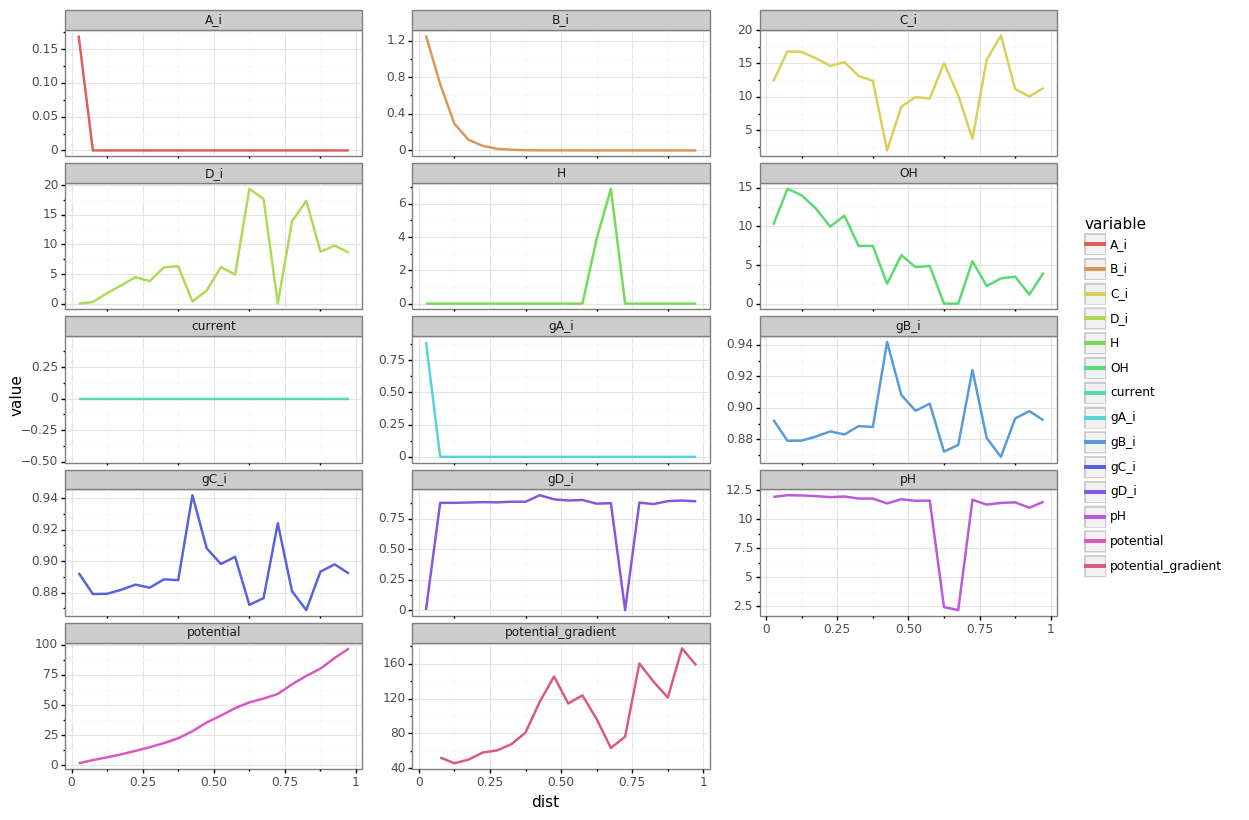

<ggplot: (118534859784)>

In [118]:
from plotnine import *

# options.figure_size = (6.4*2, 4.8*2)

(ggplot(results1_melted[results1_melted['time'] == 144], aes('dist', 'value', color='variable'))
 + geom_line(size = 1)
 + facet_wrap('~variable', ncol = 3, scales= 'free_y')
 + theme_bw() + theme(figure_size = (6.4*2, 4.8*2), panel_spacing_x = 0.5)
 ) 

## Case 2

In [290]:
## reading results
# os.getcwd()
results2 = pd.read_csv('data/sprocati2019-case2.csv', sep = '\t', skipinitialspace=True)
results2 = results2.drop([0,1])
results2 = results2.iloc[:, :-1]
# results2['d_pot'] = results['potential']/results['dist']
results2

# melting
results2_melted = pd.melt(results2, id_vars = ['dist', 'time'])
# results.melted['scenario'] = '2'
results2_melted

,dist,time,variable,value
0,0.025,0.0,K,1.000000e-96
1,0.035,0.0,K,1.000000e-96
2,0.045,0.0,K,1.000000e-96
3,0.055,0.0,K,1.000000e-96
4,0.065,0.0,K,1.000000e-96
...,...,...,...,...
144975,0.955,144.0,current,-1.421400e-02
144976,0.965,144.0,current,-1.421400e-02
144977,0.975,144.0,current,-1.421400e-02
144978,0.985,144.0,current,-1.421400e-02


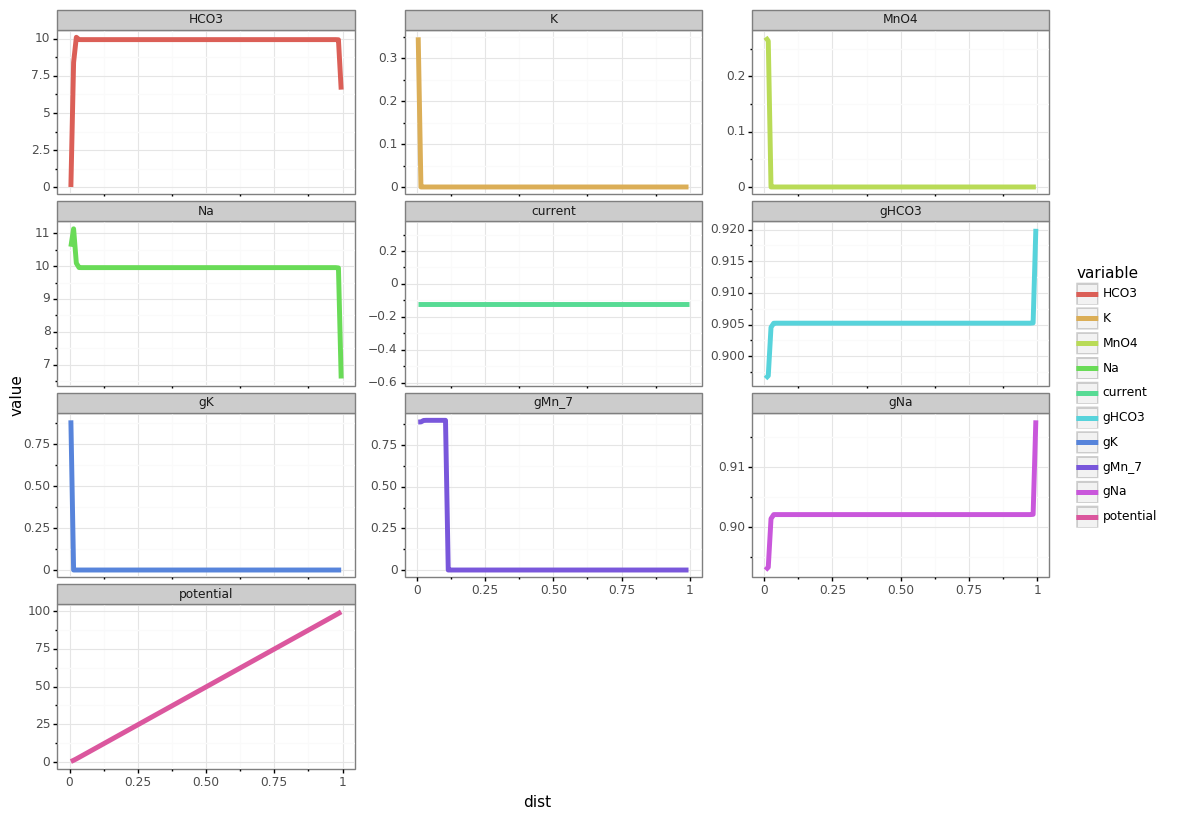

<ggplot: (105937671870)>

In [291]:
from plotnine import *

# options.figure_size = (6.4*2, 4.8*2)

(ggplot(results2_melted[results2_melted['time'] == 6], aes('dist', 'value', color='variable'))
 + geom_line(size = 2)
 + facet_wrap('~variable', ncol = 3, scales= 'free_y')
 + theme_bw() + theme(figure_size = (6.4*2, 4.8*2), panel_spacing_x = 0.5)
 ) 